In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('6Combinations.csv')
df = df.sample(frac = 1) # Shuffle a Dataframe rows
df.head()

,1disk,2disk,3disk,4disk,5disk,6disk,5.00E+01,5.20E+01,5.40E+01,5.60E+01,...,1.58E+03.3,1.58E+03.4,1.59E+03,1.59E+03.1,1.59E+03.2,1.59E+03.3,1.59E+03.4,1.60E+03,1.60E+03.1,1.60E+03.2
303,0.2,0.4,0.3,0.5,0.6,0.1,0.0997,0.131,0.120,0.118,...,0.0933,0.0935,0.0934,0.0940,0.0943,0.0931,0.0936,0.0942,0.0946,0.0947
347,0.4,0.3,0.2,0.5,0.1,0.6,0.1320,0.147,0.135,0.134,...,0.0849,0.0847,0.0846,0.0855,0.0859,0.0847,0.0841,0.0848,0.0850,0.0852
175,0.4,0.2,0.1,0.3,0.5,0.6,0.1460,0.182,0.161,0.165,...,0.1010,0.1000,0.1000,0.1020,0.1020,0.1010,0.1010,0.1010,0.1010,0.1010
388,0.6,0.2,0.5,0.4,0.3,0.1,0.1080,0.119,0.110,0.116,...,0.1800,0.1770,0.1750,0.1740,0.1720,0.1690,0.1660,0.1650,0.1620,0.1600
122,0.3,0.1,0.5,0.6,0.2,0.4,0.1350,0.173,0.164,0.174,...,0.0737,0.0733,0.0729,0.0733,0.0732,0.0733,0.0733,0.0734,0.0744,0.0744


In [3]:
# 200 Samples
# Specifying the X and Y
X_train200=df.iloc[:200,:6]
Y_train200=df.iloc[:200,6:]

# Splitting data into 70:30 train:test ratio
X_train200,X_test200,Y_train200,Y_test200=train_test_split(X_train200,Y_train200,test_size=0.3,random_state=33)

parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train200, Y_train200)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
test_preds_grid200 = gridsearch.predict(X_test200)

In [4]:
# 300 Samples
# Specifying the X and Y
X_train300=df.iloc[:300,:6]
Y_train300=df.iloc[:300,6:]

# Splitting data into 70:30 train:test ratio
X_train300,X_test300,Y_train300,Y_test300=train_test_split(X_train300,Y_train300,test_size=0.3,random_state=33)

parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train300, Y_train300)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
test_preds_grid300 = gridsearch.predict(X_test300)

In [5]:
# 400 Samples
# Specifying the X and Y
X_train400=df.iloc[:,:6]
Y_train400=df.iloc[:,6:]

# Splitting data into 70:30 train:test ratio
X_train400,X_test400,Y_train400,Y_test400=train_test_split(X_train400,Y_train400,test_size=0.3,random_state=33)

parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train400, Y_train400)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
test_preds_grid400 = gridsearch.predict(X_test400)

In [6]:
X_test200_1 = X_test200.to_numpy()
X_test300_1 = X_test300.to_numpy()
X_test400_1 = X_test400.to_numpy()
aset = set([tuple(x) for x in X_test200_1])
bset = set([tuple(x) for x in X_test300_1])
cset = set([tuple(x) for x in X_test400_1])
intersected_input = np.array([x for x in aset & bset & cset])

In [7]:
print("Number of Intersected row is ", len(intersected_input))

Number of Intersected row is  12


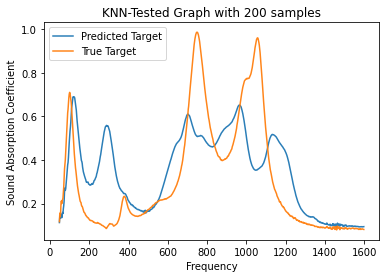

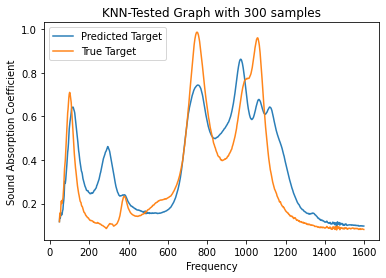

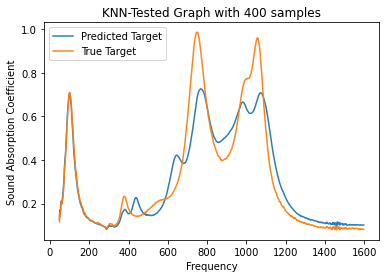

In [17]:
Input_of_Interest = intersected_input[11] # Type a number in the range from 0 to n-1 where n is given right above.
Input_of_Interest

# Find the indexes for each dataset
index_200 = np.where(np.all(X_test200_1==Input_of_Interest,axis=1))
index_300 = np.where(np.all(X_test300_1==Input_of_Interest,axis=1))
index_400 = np.where(np.all(X_test400_1==Input_of_Interest,axis=1))

# Comparison between True and Predicted Target Values
freq_range = range(48,1600,2)
plt.plot(freq_range, test_preds_grid200[index_200[0][-1]], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test200.iloc[index_200[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.title("KNN-Tested Graph with 200 samples")
plt.legend()
plt.show()

plt.plot(freq_range, test_preds_grid300[index_300[0][-1]], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test300.iloc[index_300[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.title("KNN-Tested Graph with 300 samples")
plt.legend()
plt.show()

plt.plot(freq_range, test_preds_grid400[index_400[0][-1]], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test400.iloc[index_400[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.title("KNN-Tested Graph with 400 samples")
plt.legend()
plt.show()

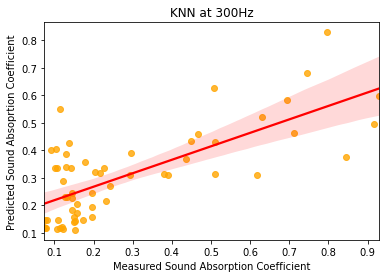

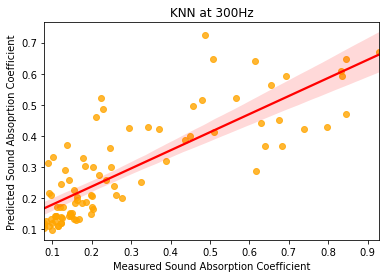

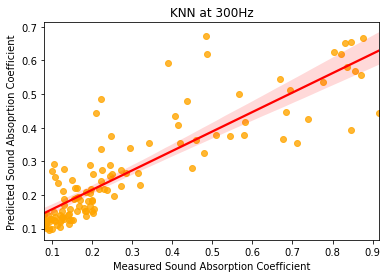

In [9]:
knn_reg = sns.regplot(x=Y_test200.iloc[:,150], y=test_preds_grid200[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test300.iloc[:,150], y=test_preds_grid300[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test400.iloc[:,150], y=test_preds_grid400[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()